# Visualizing Hourly Rate by Different Subgroups

Hopefully, one of these visualizations will be useful. Going to start by trying:
    - Hourly rate distribution by skill category

# Library and Data Importing

In [2]:
# Data and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Packages for PostgreSQL Import
import psycopg2
import os


In [105]:
# Names for accessing SQL database
dbname = "freelance_db"
username = os.environ['USER']
pswd = os.environ['SQLPSWD']

# Connect to SQL Database
con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

# Importing Data
sql_query = """SELECT * FROM analysis_table;"""
analysis_dt = pd.read_sql_query(sql_query, con)

analysis_dt.head()

,index,profile_url,hourly_rate,State,num_skills,first_skill,bio_length,bio_word_count,avg_word_length,num_stop,administrative & secretarial,business & finance,design & art,education & training,engineering & architecture,legal,programming & development,sales & marketing,writing & translation
0,0,https://www.guru.com/freelancers/scopic,24,Massachusetts,5,Angular,1901,232,7.229437,43,0,0,0,0,0,0,0,1,0
1,1,https://www.guru.com/freelancers/crazy-program...,60,Louisiana,5,Angular,154,22,6.045455,6,0,0,0,0,0,0,1,0,0
2,2,https://www.guru.com/freelancers/andrii-tsyniuk,50,Texas,5,Angular,149,26,4.769231,8,0,0,0,0,0,0,0,1,0
3,3,https://www.guru.com/freelancers/tyler-william...,55,Colorado,5,Angular,1611,245,5.579592,59,0,0,0,0,0,0,1,0,0
4,4,https://www.guru.com/freelancers/jonathan-ryan...,70,New Jersey,5,Angular,455,73,5.394366,26,0,0,0,0,0,0,1,0,0


# Reshaping

Need to get the skill categories from wide to long. Note, people can have multiple skill categories so this makes it a little more difficult than a simple reshape.

In [108]:
# First keeping only data for interest
dummies = analysis_dt[['administrative & secretarial', 'business & finance', 
                          'design & art', 'education & training', 'engineering & architecture', 
                          'legal', 'programming & development', 'sales & marketing', 
                          'writing & translation']]

main_category = dummies.idxmax(axis=1)

analysis_dt['main_category'] = main_category.str.title()

In [109]:
analysis_dt = analysis_dt[['profile_url','hourly_rate','State','main_category']]

# Visualizing - Hourly Rate vs Category

Reference: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

[Text(0, 0.5, 'Hourly Rate ($)'),
 Text(0.5, 0, 'Freelancer Skill Category'),
 Text(0.5, 1.0, 'Distribution of Hourly Rate by User Skill Category')]

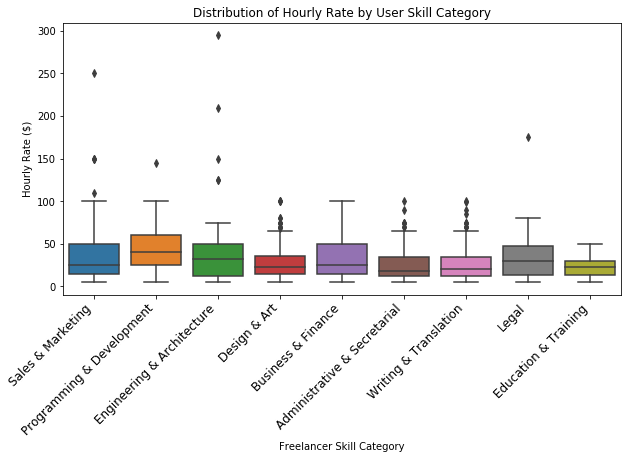

In [110]:
plt.figure(figsize=(10,5))
hourly_rate_by_category = sns.boxplot(x = 'main_category',
                                      y = 'hourly_rate',
                                      data = analysis_dt
                                     )

hourly_rate_by_category.set_xticklabels(
    hourly_rate_by_category.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
    )

hourly_rate_by_category.set(title = "Distribution of Hourly Rate by User Skill Category", 
                            ylabel = "Hourly Rate ($)",
                            xlabel = "Freelancer Skill Category")

# Visualizing - Hourly Rate vs State

In [91]:
analysis_dt.State.unique()

array(['Massachusetts', 'Louisiana', 'Texas', 'Colorado', 'New Jersey',
       'Michigan', 'California', 'Virginia', 'Arizona', 'Pennsylvania',
       'Kentucky', 'Utah', 'New York', 'Wyoming', 'Florida', 'Illinois',
       'South Dakota', 'New Mexico', 'Kansas', 'Delaware', 'Vermont',
       'Iowa', 'Connecticut', 'North Carolina', 'Maryland', 'Washington',
       'Indiana', 'Minnesota', 'District of Columbia', 'South Carolina',
       'Arkansas', 'Oregon', 'Wisconsin', 'West Virginia', 'Nevada',
       'Georgia', 'Ohio', 'Montana', 'New Hampshire', 'Oklahoma',
       'Tennessee', 'Missouri', 'Rhode Island', 'Maine', 'Alabama',
       'Idaho', 'Nebraska', 'North Dakota', 'Mississippi'], dtype=object)

[Text(0, 0.5, 'Hourly Rate ($)'),
 Text(0.5, 1.0, 'Distribution of Hourly Rate by State')]

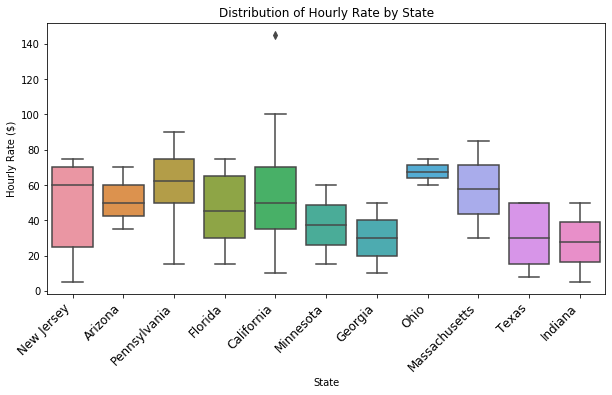

In [103]:
plot_data = analysis_dt[analysis_dt['main_category'] == 'programming & development']
plot_data = plot_data[plot_data['State'].isin(['California', 'Minnesota', 'New Jersey',
                                               'Arizona', 'Pennsylvania', 'Florida', 'Georgia',
                                               'Indiana', 'Texas', 'Massachusetts', 'Ohio'])]

plt.figure(figsize=(10,5))
hourly_rate_by_category = sns.boxplot(x = 'State',
                                      y = 'hourly_rate',
                                      data = plot_data
                                     )

hourly_rate_by_category.set_xticklabels(
    hourly_rate_by_category.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
    )

hourly_rate_by_category.set(title = "Distribution of Hourly Rate by State", ylabel = "Hourly Rate ($)")